In [341]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import datetime as dt

import dateutil.parser

In [342]:
def days_from_timedelta(td):
    return td.days

In [343]:
def year_from_timedelta(td):
    return td.year

In [344]:
def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

In [345]:
with open("data_list_1.pkl", 'rb') as picklefile: 
    movie_data_1 = pickle.load(picklefile)
dfA1 = pd.DataFrame(movie_data_1)

with open("data_list_2.pkl", 'rb') as picklefile: 
    movie_data_2 = pickle.load(picklefile)
dfA2 = pd.DataFrame(movie_data_2)

with open("data_list_3.pkl", 'rb') as picklefile: 
    movie_data_3 = pickle.load(picklefile)
dfA3 = pd.DataFrame(movie_data_3)

with open("data_list_4.pkl", 'rb') as picklefile: 
    movie_data_4 = pickle.load(picklefile)
dfA4 = pd.DataFrame(movie_data_4)

with open("data_list_5.pkl", 'rb') as picklefile: 
    movie_data_5 = pickle.load(picklefile)
dfA5 = pd.DataFrame(movie_data_5)

In [346]:
df = pd.concat([dfA1, dfA2, dfA3, dfA4, dfA5],axis = 0)
len(df)

10736

In [347]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Justice Is Mind,The Ashton Times,Unrated,Drama,NaN,2013-08-18,14024,0,5800,1,1,0
1,Today's Special,Vitagraph,R,Comedy,NaN,2010-11-19,317831,0,95400,32,55,2010-12-16 00:00:00
2,Glastonbury,ThinkFilm,R,Documentary,NaN,2007-02-23,8419,193622,1400,95,3,2007-04-12 00:00:00
3,Love Me True,Indican,Unrated,Comedy / Drama,NaN,2016-08-12,10061,0,5600,74,2,0
4,"How Much Does Your Building Weigh, Mr. Foster?",First Run,Unrated,Documentary,NaN,2012-01-25,13013,0,2900,80,4,0


In [348]:
columns = ['movie_title', 'dist_comp', 'MPAA_rating', 'genre', 'prod_bud', 'date_release', 'gtr_domestic', 
            'gtr_foreign', 'gtr_opening', 'open_ranking', 'widest_release', 'date_close']
df.columns = columns

In [349]:
# remove columns that will not be used

df.drop(['dist_comp','MPAA_rating','prod_bud','genre'],axis=1,inplace=True)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10736 entries, 0 to 432
Data columns (total 8 columns):
movie_title       10736 non-null object
date_release      10736 non-null datetime64[ns]
gtr_domestic      10736 non-null int64
gtr_foreign       10736 non-null int64
gtr_opening       10736 non-null int64
open_ranking      10736 non-null int64
widest_release    10736 non-null int64
date_close        10736 non-null object
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 754.9+ KB


In [351]:
df.dtypes

movie_title               object
date_release      datetime64[ns]
gtr_domestic               int64
gtr_foreign                int64
gtr_opening                int64
open_ranking               int64
widest_release             int64
date_close                object
dtype: object

In [352]:
df.describe()

,gtr_domestic,gtr_foreign,gtr_opening,open_ranking,widest_release
count,1.073600e+04,1.073600e+04,1.073600e+04,1.073600e+04,10736.000000
mean,1.707494e+07,2.022478e+07,5.402583e+06,1.961230e+03,632.257917
std,4.934241e+07,7.361507e+07,1.585097e+07,6.119742e+04,1160.580807
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.986550e+04,0.000000e+00,3.700000e+03,4.000000e+00,3.000000
50%,2.013350e+05,0.000000e+00,2.240000e+04,3.900000e+01,19.000000
75%,7.080110e+06,5.791106e+06,6.173000e+05,7.100000e+01,309.000000
max,9.366622e+08,2.027457e+09,2.402712e+08,2.009311e+06,5747.000000


In [353]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [354]:
a = list(df.columns)
b = list(df.isnull().sum(axis=0).tolist())
list(zip(a,b))

[('movie_title', 0),
 ('date_release', 0),
 ('gtr_domestic', 0),
 ('gtr_foreign', 0),
 ('gtr_opening', 0),
 ('open_ranking', 0),
 ('widest_release', 0),
 ('date_close', 0)]

### Merge data with the-numbers for budget information

In [355]:
# unpickle budget data from http://www.the-numbers.com/movie/budgets/

with open("budget_numbers.pkl", 'rb') as picklefile: 
    df_numbers = pickle.load(picklefile)

df_numbers.head(10)

,dom_gross,movie_title,prod_budget,world_gross
0,760507625,Avatar,425000000,2783918982
1,936662225,Star Wars Ep. VII: The Force Awakens,306000000,2058662225
2,309420425,Pirates of the Caribbean: At World's End,300000000,963420425
3,200074175,Spectre,300000000,879620923
4,448139099,The Dark Knight Rises,275000000,1084439099
5,89302115,The Lone Ranger,275000000,260002115
6,73058679,John Carter,275000000,282778100
7,200821936,Tangled,260000000,586581936
8,336530303,Spider-Man 3,258000000,890875303
9,459005868,Avengers: Age of Ultron,250000000,1404705868


In [737]:
df_numbers['prod_budget'].mean() * 7100 / 1000000 

218109.8893926386

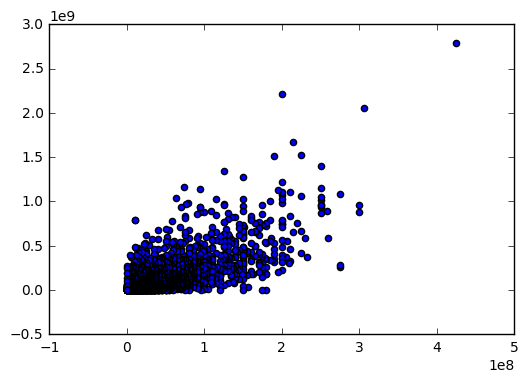

In [356]:
x = df_numbers['prod_budget']
y = df_numbers['world_gross']
plt.scatter(x,y)

In [357]:
df_numbers['contribution'] = df_numbers['prod_budget'] / sum(x)
df_numbers['cum_sum'] = df_numbers['contribution'].cumsum()
df_numbers

,dom_gross,movie_title,prod_budget,world_gross,contribution,cum_sum
0,760507625,Avatar,425000000,2783918982,2.645271e-03,0.002645
1,936662225,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,1.904595e-03,0.004550
2,309420425,Pirates of the Caribbean: At World's End,300000000,963420425,1.867250e-03,0.006417
3,200074175,Spectre,300000000,879620923,1.867250e-03,0.008284
4,448139099,The Dark Knight Rises,275000000,1084439099,1.711646e-03,0.009996
5,89302115,The Lone Ranger,275000000,260002115,1.711646e-03,0.011708
6,73058679,John Carter,275000000,282778100,1.711646e-03,0.013419
7,200821936,Tangled,260000000,586581936,1.618284e-03,0.015038
8,336530303,Spider-Man 3,258000000,890875303,1.605835e-03,0.016643
9,459005868,Avengers: Age of Ultron,250000000,1404705868,1.556042e-03,0.018199


In [658]:
big_budget_threshold = float(0.61)

def threshold(row):
    if row['cum_sum'] <= big_budget_threshold:
        val = 1
    else:
        val = 0
    return val

df_numbers['big_budget'] = df_numbers.apply(threshold, axis=1)
sum(df_numbers['big_budget'])/df_numbers.shape[0]

0.19789674952198852

In [659]:
df_numbers.columns

Index(['dom_gross', 'movie_title', 'prod_budget', 'world_gross',
       'contribution', 'cum_sum', 'big_budget'],
      dtype='object')

In [660]:
df_num = df_numbers.drop(['dom_gross','world_gross','contribution','cum_sum'],axis=1)
df_num.head(10)

,movie_title,prod_budget,big_budget
0,Avatar,425000000,1
1,Star Wars Ep. VII: The Force Awakens,306000000,1
2,Pirates of the Caribbean: At World's End,300000000,1
3,Spectre,300000000,1
4,The Dark Knight Rises,275000000,1
5,The Lone Ranger,275000000,1
6,John Carter,275000000,1
7,Tangled,260000000,1
8,Spider-Man 3,258000000,1
9,Avengers: Age of Ultron,250000000,1


In [661]:
df1 = df.copy()
df1 = pd.merge(df, df_num, on='movie_title', how='left')

In [662]:
print(len(df))
print(len(df1))
print(len(df1)-len(df))

10736
10812
76


In [663]:
a = list(df.columns)
b = list(df.isnull().sum(axis=0).tolist())
list(zip(a,b))

[('movie_title', 0),
 ('date_release', 0),
 ('gtr_domestic', 0),
 ('gtr_foreign', 0),
 ('gtr_opening', 0),
 ('open_ranking', 0),
 ('widest_release', 0),
 ('date_close', 0)]

## Create a few additional columns

In [664]:
# release duration
df1.columns

Index(['movie_title', 'date_release', 'gtr_domestic', 'gtr_foreign',
       'gtr_opening', 'open_ranking', 'widest_release', 'date_close',
       'prod_budget', 'big_budget'],
      dtype='object')

In [665]:
df_joint = df1.copy()

In [666]:
# WARNING: the script below takes some time to excecute

In [667]:
dr_list = [pd.Timestamp(i) for i in df_joint['date_release']]
dc_list = [pd.Timestamp(j) for j in df_joint['date_close']]
diff_list = [a - b for a, b in zip(dc_list, dr_list)]
diff_list

[Timedelta('-15935 days +00:00:00'),
 Timedelta('27 days 00:00:00'),
 Timedelta('48 days 00:00:00'),
 Timedelta('-17025 days +00:00:00'),
 Timedelta('-15364 days +00:00:00'),
 Timedelta('27 days 00:00:00'),
 Timedelta('55 days 00:00:00'),
 Timedelta('-14230 days +00:00:00'),
 Timedelta('97 days 00:00:00'),
 Timedelta('-16724 days +00:00:00'),
 Timedelta('85 days 00:00:00'),
 Timedelta('-10900 days +00:00:00'),
 Timedelta('-11257 days +00:00:00'),
 Timedelta('-15737 days +00:00:00'),
 Timedelta('107 days 00:00:00'),
 Timedelta('-15947 days +00:00:00'),
 Timedelta('41 days 00:00:00'),
 Timedelta('-16731 days +00:00:00'),
 Timedelta('-14764 days +00:00:00'),
 Timedelta('90 days 00:00:00'),
 Timedelta('13 days 00:00:00'),
 Timedelta('9 days 00:00:00'),
 Timedelta('-17305 days +00:00:00'),
 Timedelta('64 days 00:00:00'),
 Timedelta('146 days 00:00:00'),
 Timedelta('4 days 00:00:00'),
 Timedelta('-15604 days +00:00:00'),
 Timedelta('-17081 days +00:00:00'),
 Timedelta('254 days 00:00:00'),
 

In [668]:
dd_series = []
for i in diff_list:
    if days_from_timedelta(i) < 0:
        dd_series.append(np.nan)
    else:
        dd_series.append(days_from_timedelta(i))

In [669]:
df_joint['days_in_release'] = dd_series

In [670]:
df_joint.head()

,movie_title,date_release,gtr_domestic,gtr_foreign,gtr_opening,open_ranking,widest_release,date_close,prod_budget,big_budget,days_in_release
0,Justice Is Mind,2013-08-18,14024,0,5800,1,1,0,NaN,NaN,NaN
1,Today's Special,2010-11-19,317831,0,95400,32,55,2010-12-16 00:00:00,NaN,NaN,27.0
2,Glastonbury,2007-02-23,8419,193622,1400,95,3,2007-04-12 00:00:00,NaN,NaN,48.0
3,Love Me True,2016-08-12,10061,0,5600,74,2,0,NaN,NaN,NaN
4,"How Much Does Your Building Weigh, Mr. Foster?",2012-01-25,13013,0,2900,80,4,0,NaN,NaN,NaN


In [671]:
# add year of release
df_joint['year_of_release'] = [year_from_timedelta(i) for i in df_joint['date_release']]
len(df_joint['year_of_release'])

10812

In [672]:
# add week of year index
df_joint['week_of_year'] = [i.weekofyear for i in df_joint['date_release']]
len(df_joint['week_of_year'])

10812

In [673]:
# add week + year

str_wof = [str(float(i/10)).replace('.','') for i in df_joint['week_of_year']]
str_yor = [str(j) for j in df_joint['year_of_release']]
yow_str = [j+i for j, i in zip(str_yor, str_wof)]
len(yow_str)

10812

In [674]:
df_joint['year_week_index'] = yow_str
df_joint.head()

,movie_title,date_release,gtr_domestic,gtr_foreign,gtr_opening,open_ranking,widest_release,date_close,prod_budget,big_budget,days_in_release,year_of_release,week_of_year,year_week_index
0,Justice Is Mind,2013-08-18,14024,0,5800,1,1,0,NaN,NaN,NaN,2013,33,201333
1,Today's Special,2010-11-19,317831,0,95400,32,55,2010-12-16 00:00:00,NaN,NaN,27.0,2010,46,201046
2,Glastonbury,2007-02-23,8419,193622,1400,95,3,2007-04-12 00:00:00,NaN,NaN,48.0,2007,8,200708
3,Love Me True,2016-08-12,10061,0,5600,74,2,0,NaN,NaN,NaN,2016,32,201632
4,"How Much Does Your Building Weigh, Mr. Foster?",2012-01-25,13013,0,2900,80,4,0,NaN,NaN,NaN,2012,4,201204


In [675]:
# add total sales worldwide
df_joint['total_world_sales'] = df_joint['gtr_domestic'] + df_joint['gtr_foreign']

In [676]:
# domestic first weekend as % of total weekend
df_joint['open_weekend_%total'] = df_joint['gtr_opening'] / (df_joint['gtr_domestic'])
df_joint['open_weekend_%total'].median()

0.31148178223392664

In [677]:
# add total sales worldwide
df_joint['domestic_sales_%_world'] = df_joint['gtr_domestic'] / df_joint['total_world_sales']
print(df_joint['domestic_sales_%_world'].mean())
print(df_joint['domestic_sales_%_world'].median())
print(len(df_joint[df_joint['gtr_foreign'] > 0])/df_joint.shape[0])

0.7424136230263385
1.0
0.4437661857195708


In [678]:
df_joint.columns

Index(['movie_title', 'date_release', 'gtr_domestic', 'gtr_foreign',
       'gtr_opening', 'open_ranking', 'widest_release', 'date_close',
       'prod_budget', 'big_budget', 'days_in_release', 'year_of_release',
       'week_of_year', 'year_week_index', 'total_world_sales',
       'open_weekend_%total', 'domestic_sales_%_world'],
      dtype='object')

In [679]:
# value of opening weekend domestic box office revenues within movies released in 2 week bookend 


In [680]:
with open("df_week.pkl", 'rb') as picklefile: 
    df_week = pickle.load(picklefile)

In [681]:
l = df_week['week_movies_out']
l.sort_values()

46    100
1     100
0     100
0     100
28    100
1     100
50    100
49    100
51    101
0     101
43    101
30    101
45    101
50    101
50    102
4     102
2     102
50    102
0     102
24    102
27    102
45    102
50    103
46    103
49    103
51    103
33    103
49    103
1     103
0     103
     ... 
51     92
0      92
50     93
1      93
0      93
48     93
1      94
47     94
51     95
26     95
28     95
50     95
49     95
1      96
1      96
37     96
46     96
45     97
48     97
2      98
50     98
51     98
33     98
34     98
1      99
49     99
0      99
1      99
50     99
44     99
Name: week_movies_out, dtype: object

In [682]:
weekofyear = df_week['week_of_year']
df_week['weekofyearstr'] = [str(float(i)/10).replace('.','') for i in weekofyear]
df_week.head()

,week_movies_out,week_of_year,week_overall_gross,year_list,weekofyearstr
0,55,53,161598334,1999,53
1,56,52,238921917,1999,52
2,52,51,149009815,1999,51
3,55,50,100597301,1999,50
4,60,49,99294909,1999,49


In [683]:
df_week.dtypes

week_movies_out       object
week_of_year          object
week_overall_gross     int64
year_list             object
weekofyearstr         object
dtype: object

In [684]:
df_week['year_week_index'] = df_week['year_list'] + df_week['weekofyearstr']
df_week

,week_movies_out,week_of_year,week_overall_gross,year_list,weekofyearstr,year_week_index
0,55,53,161598334,1999,53,199953
1,56,52,238921917,1999,52,199952
2,52,51,149009815,1999,51,199951
3,55,50,100597301,1999,50,199950
4,60,49,99294909,1999,49,199949
5,57,48,188810023,1999,48,199948
6,59,47,203724346,1999,47,199947
7,54,46,130385765,1999,46,199946
8,59,45,127048569,1999,45,199945
9,61,44,90569340,1999,44,199944


In [685]:
df_week1 = df_week.copy()
df_week.head()

,week_movies_out,week_of_year,week_overall_gross,year_list,weekofyearstr,year_week_index
0,55,53,161598334,1999,53,199953
1,56,52,238921917,1999,52,199952
2,52,51,149009815,1999,51,199951
3,55,50,100597301,1999,50,199950
4,60,49,99294909,1999,49,199949


In [686]:
# get the chart for year on year movies out and week overall gross
plot_df = df_week.groupby('year_list')
plot_df.head()

,week_movies_out,week_of_year,week_overall_gross,year_list,weekofyearstr,year_week_index
0,55,53,161598334,1999,53,199953
1,56,52,238921917,1999,52,199952
2,52,51,149009815,1999,51,199951
3,55,50,100597301,1999,50,199950
4,60,49,99294909,1999,49,199949
0,57,52,233483221,2000,52,200052
1,59,51,288450694,2000,51,200051
2,45,50,153328832,2000,50,200050
3,53,49,110120569,2000,49,200049
4,51,48,108366192,2000,48,200048


In [687]:
df_week1 = df_week1.drop('week_of_year',axis=1)
df_week1 = df_week1.drop('year_list',axis=1)

In [688]:
listofmoviesout = list(df_week1['week_movies_out'])
movies_out = [int(i) for i in listofmoviesout]
df_week1['week_movies_out'] = np.asarray(movies_out)

In [689]:
df_week1.head()

,week_movies_out,week_overall_gross,weekofyearstr,year_week_index
0,55,161598334,53,199953
1,56,238921917,52,199952
2,52,149009815,51,199951
3,55,100597301,50,199950
4,60,99294909,49,199949


In [690]:
df_joint1 = df_joint.copy()
df_joint1.shape

(10812, 17)

In [691]:
df_joint1 = pd.merge(df_joint1, df_week1, on='year_week_index')
df_joint1.shape

(10469, 20)

In [692]:
df_joint1.head()

,movie_title,date_release,gtr_domestic,gtr_foreign,gtr_opening,open_ranking,widest_release,date_close,prod_budget,big_budget,days_in_release,year_of_release,week_of_year,year_week_index,total_world_sales,open_weekend_%total,domestic_sales_%_world,week_movies_out,week_overall_gross,weekofyearstr
0,Justice Is Mind,2013-08-18,14024,0,5800,1,1,0,NaN,NaN,NaN,2013,33,201333,14024,0.413577,1.000000,125,205634617,33
1,Blue Exorcist The Movie,2013-08-17,21796,0,0,26,26,0,NaN,NaN,NaN,2013,33,201333,21796,0.000000,1.000000,125,205634617,33
2,Drew: The Man Behind the Poster,2013-08-14,3078,0,1900,97,1,2013-08-29 00:00:00,NaN,NaN,15.0,2013,33,201333,3078,0.617284,1.000000,125,205634617,33
3,Paranoia,2013-08-16,7385015,6400000,3793900,13,2459,2013-10-03 00:00:00,40000000.0,0.0,48.0,2013,33,201333,13785015,0.513729,0.535728,125,205634617,33
4,The Anonymous People,2013-08-16,284147,0,0,27,27,0,NaN,NaN,NaN,2013,33,201333,284147,0.000000,1.000000,125,205634617,33


In [693]:
print(len(df_joint))
print(len(df_joint1))
print(len(df_joint1)-len(df_joint))

10812
10469
-343


In [694]:
df_joint1.columns

Index(['movie_title', 'date_release', 'gtr_domestic', 'gtr_foreign',
       'gtr_opening', 'open_ranking', 'widest_release', 'date_close',
       'prod_budget', 'big_budget', 'days_in_release', 'year_of_release',
       'week_of_year', 'year_week_index', 'total_world_sales',
       'open_weekend_%total', 'domestic_sales_%_world', 'week_movies_out',
       'week_overall_gross', 'weekofyearstr'],
      dtype='object')

In [695]:
# create a groupby table, grouped by year_week_index

x = df_joint1.groupby('year_week_index').sum().index
yearweekint = [int(i) for i in x]
len(yearweekint)

923

In [696]:
y = df_joint1.groupby('year_week_index').sum()
df_y = pd.DataFrame(y['gtr_opening'])
df_y['yearweekint'] = yearweekint
df_yy = df_y.sort_values(by ='yearweekint').reset_index()
df_yy = df_yy.rename(columns = {'yearweekint':'merge1'})
df_yy['merge2'] = df_yy['merge1']
df_yy.head()

,year_week_index,gtr_opening,merge1,merge2
0,199901,51600,199901,199901
1,199902,55848000,199902,199902
2,199903,3924300,199903,199903
3,199904,26699800,199904,199904
4,199905,38979800,199905,199905


In [697]:
df_z = df_y.copy()
df_z.rename(columns={'gtr_opening':'gtr_opening_new'},inplace=True)
df_z['merge1'] = df_z['yearweekint'] - 1
df_z['merge2'] = df_z['yearweekint'] + 1
df_zz = df_z.reset_index()
df_zz.head()

,year_week_index,gtr_opening_new,yearweekint,merge1,merge2
0,199901,51600,199901,199900,199902
1,199902,55848000,199902,199901,199903
2,199903,3924300,199903,199902,199904
3,199904,26699800,199904,199903,199905
4,199905,38979800,199905,199904,199906


In [698]:
df_zzz = pd.merge(df_zz, df_yy, on='merge1')

In [699]:
df_zzz = df_zzz.rename(columns = {'merge2_x':'merge2'})
df_zzzz = pd.merge(df_zzz, df_yy, on='merge2')
df_zzzz.head()

,year_week_index_x,gtr_opening_new,yearweekint,merge1_x,merge2,year_week_index_y,gtr_opening_x,merge2_y,year_week_index,gtr_opening_y,merge1_y
0,199902,55848000,199902,199901,199903,199901,51600,199901,199903,3924300,199903
1,199903,3924300,199903,199902,199904,199902,55848000,199902,199904,26699800,199904
2,199904,26699800,199904,199903,199905,199903,3924300,199903,199905,38979800,199905
3,199905,38979800,199905,199904,199906,199904,26699800,199904,199906,55485700,199906
4,199906,55485700,199906,199905,199907,199905,38979800,199905,199907,19507800,199907


In [700]:
df_three_week_opening_gtr = df_zzzz[['year_week_index','gtr_opening_new','gtr_opening_x','gtr_opening_y']].copy()
df_three_week_opening_gtr

,year_week_index,gtr_opening_new,gtr_opening_x,gtr_opening_y
0,199903,55848000,51600,3924300
1,199904,3924300,55848000,26699800
2,199905,26699800,3924300,38979800
3,199906,38979800,26699800,55485700
4,199907,55485700,38979800,19507800
5,199908,19507800,55485700,40764900
6,199909,40764900,19507800,52522600
7,199910,52522600,40764900,48423600
8,199911,48423600,52522600,39571600
9,199912,39571600,48423600,31609900


In [701]:
df_three_week_opening_gtr['three_week_total'] = df_three_week_opening_gtr['gtr_opening_new'] + \
                                                df_three_week_opening_gtr['gtr_opening_x'] + \
                                                df_three_week_opening_gtr['gtr_opening_y']
df_three_week_opening_gtr.head()

,year_week_index,gtr_opening_new,gtr_opening_x,gtr_opening_y,three_week_total
0,199903,55848000,51600,3924300,59823900
1,199904,3924300,55848000,26699800,86472100
2,199905,26699800,3924300,38979800,69603900
3,199906,38979800,26699800,55485700,121165300
4,199907,55485700,38979800,19507800,113973300


In [702]:
df_joint2 = df_joint1.copy()
df_joint2 = pd.merge(df_joint2, df_three_week_opening_gtr, on='year_week_index')
df_joint2.head()

,movie_title,date_release,gtr_domestic,gtr_foreign,gtr_opening,open_ranking,widest_release,date_close,prod_budget,big_budget,...,total_world_sales,open_weekend_%total,domestic_sales_%_world,week_movies_out,week_overall_gross,weekofyearstr,gtr_opening_new,gtr_opening_x,gtr_opening_y,three_week_total
0,Justice Is Mind,2013-08-18,14024,0,5800,1,1,0,NaN,NaN,...,14024,0.413577,1.000000,125,205634617,33,102590700,48065800,52032000,202688500
1,Blue Exorcist The Movie,2013-08-17,21796,0,0,26,26,0,NaN,NaN,...,21796,0.000000,1.000000,125,205634617,33,102590700,48065800,52032000,202688500
2,Drew: The Man Behind the Poster,2013-08-14,3078,0,1900,97,1,2013-08-29 00:00:00,NaN,NaN,...,3078,0.617284,1.000000,125,205634617,33,102590700,48065800,52032000,202688500
3,Paranoia,2013-08-16,7385015,6400000,3793900,13,2459,2013-10-03 00:00:00,40000000.0,0.0,...,13785015,0.513729,0.535728,125,205634617,33,102590700,48065800,52032000,202688500
4,The Anonymous People,2013-08-16,284147,0,0,27,27,0,NaN,NaN,...,284147,0.000000,1.000000,125,205634617,33,102590700,48065800,52032000,202688500


In [703]:
print(len(df_joint1))
print(len(df_joint2))
print(len(df_joint2)-len(df_joint1))

10469
10233
-236


In [704]:
df_joint2.columns

Index(['movie_title', 'date_release', 'gtr_domestic', 'gtr_foreign',
       'gtr_opening', 'open_ranking', 'widest_release', 'date_close',
       'prod_budget', 'big_budget', 'days_in_release', 'year_of_release',
       'week_of_year', 'year_week_index', 'total_world_sales',
       'open_weekend_%total', 'domestic_sales_%_world', 'week_movies_out',
       'week_overall_gross', 'weekofyearstr', 'gtr_opening_new',
       'gtr_opening_x', 'gtr_opening_y', 'three_week_total'],
      dtype='object')

In [705]:
df_joint2.drop(['date_release','open_weekend_%total','domestic_sales_%_world',
         'gtr_opening_new','gtr_opening_x','gtr_opening_y'],axis=1,inplace=True)

In [706]:
yearweekindex = list(df_joint1['year_week_index'])
yearweekindexint = [int(i) for i in yearweekindex]
year_week_index_int = np.asarray(yearweekindexint)
df_joint1['year_week_index_int'] = year_week_index_int

In [707]:
releaseweekofyear = df_joint1['year_week_index_int']
release_hist = releaseweekofyear.value_counts()
release_frame = release_hist.to_frame()
release_frame = release_frame.sort_index()
release_frame['year_week_index'] = release_frame.index
release_frame.head()

,year_week_index_int,year_week_index
199901,2,199901
199902,4,199902
199903,6,199903
199904,3,199904
199905,4,199905


In [708]:
release_list = list(release_frame['year_week_index_int'])
print(len(release_list))
release_list

923


[2,
 4,
 6,
 3,
 4,
 5,
 4,
 10,
 7,
 9,
 8,
 7,
 9,
 9,
 11,
 9,
 11,
 9,
 11,
 6,
 7,
 10,
 3,
 7,
 5,
 8,
 5,
 6,
 6,
 3,
 9,
 6,
 8,
 10,
 4,
 11,
 9,
 9,
 10,
 7,
 12,
 8,
 12,
 9,
 7,
 7,
 5,
 10,
 7,
 9,
 9,
 3,
 2,
 2,
 5,
 4,
 10,
 5,
 4,
 8,
 7,
 6,
 6,
 5,
 7,
 8,
 8,
 8,
 7,
 7,
 8,
 7,
 3,
 7,
 4,
 7,
 6,
 3,
 8,
 6,
 7,
 8,
 5,
 11,
 9,
 7,
 8,
 5,
 9,
 16,
 11,
 9,
 15,
 6,
 6,
 13,
 7,
 7,
 7,
 5,
 2,
 7,
 5,
 14,
 11,
 3,
 5,
 8,
 9,
 6,
 3,
 4,
 8,
 8,
 7,
 3,
 8,
 8,
 7,
 8,
 8,
 7,
 7,
 4,
 4,
 5,
 8,
 10,
 6,
 6,
 7,
 7,
 5,
 6,
 6,
 9,
 7,
 10,
 6,
 7,
 5,
 7,
 8,
 9,
 8,
 9,
 13,
 9,
 5,
 7,
 7,
 9,
 4,
 11,
 7,
 10,
 5,
 4,
 6,
 10,
 4,
 5,
 8,
 9,
 8,
 4,
 9,
 5,
 9,
 11,
 8,
 14,
 12,
 8,
 12,
 9,
 8,
 5,
 9,
 9,
 10,
 8,
 8,
 14,
 7,
 8,
 6,
 11,
 7,
 11,
 7,
 8,
 11,
 15,
 15,
 6,
 18,
 16,
 16,
 8,
 12,
 9,
 9,
 8,
 9,
 9,
 14,
 10,
 3,
 5,
 10,
 6,
 9,
 8,
 10,
 14,
 7,
 9,
 8,
 10,
 9,
 12,
 9,
 9,
 15,
 11,
 11,
 14,
 5,
 9,
 10,
 11,
 7,
 5,
 6,
 12,
 1

In [709]:
three_week_release_count = []
for i, j in enumerate(release_list):
    try:
        three_week_release_count.append(release_list[j] + release_list[j-1] + release_list[j+1])
    except:
        continue

print(len(three_week_release_count))
three_week_release_count

923


[13,
 12,
 19,
 13,
 12,
 13,
 12,
 24,
 21,
 24,
 26,
 21,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 19,
 21,
 24,
 13,
 21,
 13,
 26,
 13,
 19,
 19,
 13,
 24,
 19,
 26,
 24,
 12,
 24,
 24,
 24,
 24,
 21,
 25,
 26,
 25,
 24,
 21,
 21,
 13,
 24,
 21,
 24,
 24,
 13,
 13,
 13,
 13,
 12,
 24,
 13,
 12,
 26,
 21,
 19,
 19,
 13,
 21,
 26,
 26,
 26,
 21,
 21,
 26,
 21,
 13,
 21,
 12,
 21,
 19,
 13,
 26,
 19,
 21,
 26,
 13,
 24,
 24,
 21,
 26,
 13,
 24,
 29,
 24,
 24,
 31,
 19,
 19,
 29,
 21,
 21,
 21,
 13,
 13,
 21,
 13,
 29,
 24,
 13,
 13,
 26,
 24,
 19,
 13,
 12,
 26,
 26,
 21,
 13,
 26,
 26,
 21,
 26,
 26,
 21,
 21,
 12,
 12,
 13,
 26,
 24,
 19,
 19,
 21,
 21,
 13,
 19,
 19,
 24,
 21,
 24,
 19,
 21,
 13,
 21,
 26,
 24,
 26,
 24,
 29,
 24,
 13,
 21,
 21,
 24,
 12,
 24,
 21,
 24,
 13,
 12,
 19,
 24,
 12,
 13,
 26,
 24,
 26,
 12,
 24,
 13,
 24,
 24,
 26,
 29,
 25,
 26,
 25,
 24,
 26,
 13,
 24,
 24,
 24,
 26,
 26,
 29,
 21,
 26,
 19,
 24,
 21,
 24,
 21,
 26,
 24,
 31,
 31,
 19,
 26,
 29,
 29,
 26,


In [710]:
three_week_release_array = np.asarray(three_week_release_count)
release_frame['three_week_opening'] = three_week_release_array
release_frame

,year_week_index_int,year_week_index,three_week_opening
199901,2,199901,13
199902,4,199902,12
199903,6,199903,19
199904,3,199904,13
199905,4,199905,12
199906,5,199906,13
199907,4,199907,12
199908,10,199908,24
199909,7,199909,21
199910,9,199910,24


In [711]:
releaseweekofyear = df_joint1['year_week_index_int'].to_frame()
openinggtr = df_joint1['gtr_opening'].to_frame()
df_openinggtr = pd.concat([releaseweekofyear,openinggtr],axis=1)
df_groupbyrelease = df_openinggtr.groupby(by='year_week_index_int').sum()
df_groupbyrelease.reset_index().head()

,year_week_index_int,gtr_opening
0,199901,51600
1,199902,55848000
2,199903,3924300
3,199904,26699800
4,199905,38979800


In [712]:
list_gtropening = list(df_groupbyrelease['gtr_opening'])
len(list_gtropening)
list_gtropening

[51600,
 55848000,
 3924300,
 26699800,
 38979800,
 55485700,
 19507800,
 40764900,
 52522600,
 48423600,
 39571600,
 31609900,
 74010600,
 35889800,
 36066400,
 12322500,
 37045500,
 72247800,
 21468400,
 116997300,
 41923800,
 18252100,
 91294000,
 94673500,
 69211500,
 75554100,
 43616900,
 76382200,
 98889800,
 89963800,
 98472100,
 39890600,
 30180100,
 44076500,
 11910000,
 42949200,
 53798800,
 46069600,
 49090600,
 36970700,
 38709300,
 42924900,
 33523200,
 52626500,
 89820200,
 109442100,
 36949500,
 647400,
 50352600,
 47540100,
 67827300,
 83800,
 45600,
 389100,
 31716800,
 12562900,
 12547600,
 55839300,
 61368700,
 70221900,
 22035300,
 29068100,
 46175600,
 59746300,
 41895700,
 50079900,
 47618600,
 40650400,
 48020700,
 43902500,
 60179400,
 33680800,
 91055900,
 115594100,
 40317500,
 40313700,
 59707000,
 65328400,
 110676300,
 86306100,
 85495000,
 88862000,
 73196600,
 97375300,
 49785700,
 51586300,
 50350200,
 11563200,
 31116300,
 12208100,
 29869700,
 36207700

In [713]:
three_week_gtr_total = [0,]
for i, j in enumerate(list_gtropening):
    try:
        three_week_gtr_total.append(list_gtropening[i] + list_gtropening[i-1] + list_gtropening[i+1])
    except:
        continue

print(len(three_week_gtr_total))
three_week_gtr_total

923


[0,
 111448400,
 59823900,
 86472100,
 69603900,
 121165300,
 113973300,
 115758400,
 112795300,
 141711100,
 140517800,
 119605100,
 145192100,
 141510300,
 145966800,
 84278700,
 85434400,
 121615800,
 130761700,
 210713500,
 180389500,
 177173200,
 151469900,
 204219600,
 255179000,
 239439100,
 188382500,
 195553200,
 218888900,
 265235800,
 287325700,
 228326500,
 168542800,
 114147200,
 86166600,
 98935700,
 108658000,
 142817600,
 148959000,
 132130900,
 124770600,
 118604900,
 115157400,
 129074600,
 175969900,
 251888800,
 236211800,
 147039000,
 87949500,
 98540100,
 165720000,
 115451200,
 67956700,
 518500,
 32151500,
 44668800,
 56827300,
 80949800,
 129755600,
 187429900,
 153625900,
 121325300,
 97279000,
 134990000,
 147817600,
 151721900,
 139594200,
 138348900,
 136289700,
 132573600,
 152102600,
 137762700,
 184916100,
 240330800,
 246967500,
 196225300,
 140338200,
 165349100,
 235711700,
 262310800,
 282477400,
 260663100,
 247553600,
 259433900,
 220357600,
 19874

In [714]:
three_week_gtr_array = np.asarray(three_week_gtr_total)
release_frame['three_week_opening_gtr'] = three_week_gtr_array
release_frame

,year_week_index_int,year_week_index,three_week_opening,three_week_opening_gtr
199901,2,199901,13,0
199902,4,199902,12,111448400
199903,6,199903,19,59823900
199904,3,199904,13,86472100
199905,4,199905,12,69603900
199906,5,199906,13,121165300
199907,4,199907,12,113973300
199908,10,199908,24,115758400
199909,7,199909,21,112795300
199910,9,199910,24,141711100


In [715]:
l = np.asarray(release_frame['year_week_index'].apply(str))
release_frame['year_week_index'] = l

In [716]:
df_joint3 = df_joint2.copy()
df_joint3 = pd.merge(df_joint2, release_frame, on='year_week_index')
df_joint3.head()

,movie_title,gtr_domestic,gtr_foreign,gtr_opening,open_ranking,widest_release,date_close,prod_budget,big_budget,days_in_release,...,week_of_year,year_week_index,total_world_sales,week_movies_out,week_overall_gross,weekofyearstr,three_week_total,year_week_index_int,three_week_opening,three_week_opening_gtr
0,Justice Is Mind,14024,0,5800,1,1,0,NaN,NaN,NaN,...,33,201333,14024,125,205634617,33,202688500,20,23,202688500
1,Blue Exorcist The Movie,21796,0,0,26,26,0,NaN,NaN,NaN,...,33,201333,21796,125,205634617,33,202688500,20,23,202688500
2,Drew: The Man Behind the Poster,3078,0,1900,97,1,2013-08-29 00:00:00,NaN,NaN,15.0,...,33,201333,3078,125,205634617,33,202688500,20,23,202688500
3,Paranoia,7385015,6400000,3793900,13,2459,2013-10-03 00:00:00,40000000.0,0.0,48.0,...,33,201333,13785015,125,205634617,33,202688500,20,23,202688500
4,The Anonymous People,284147,0,0,27,27,0,NaN,NaN,NaN,...,33,201333,284147,125,205634617,33,202688500,20,23,202688500


In [717]:
# add total releases in week

df_joint3.rename(columns={'year_week_index_int':'new_releases_in_same_week'},inplace=True)

In [718]:
df_joint3.dtypes

movie_title                   object
gtr_domestic                   int64
gtr_foreign                    int64
gtr_opening                    int64
open_ranking                   int64
widest_release                 int64
date_close                    object
prod_budget                  float64
big_budget                   float64
days_in_release              float64
year_of_release                int64
week_of_year                   int64
year_week_index               object
total_world_sales              int64
week_movies_out                int64
week_overall_gross             int64
weekofyearstr                 object
three_week_total               int64
new_releases_in_same_week      int64
three_week_opening             int64
three_week_opening_gtr         int64
dtype: object

In [719]:
infl_deflator = [(1998,1.40715375816499),
                    (1999,1.39204648736136),
                    (2000,1.37106478293017),
                    (2001,1.34056007296979),
                    (2002,1.31069073029101),
                    (2003,1.29087420294437),
                    (2004,1.26563669515581),
                    (2005,1.23176654970878),
                    (2006,1.19336827561111),
                    (2007,1.1577976449791),
                    (2008,1.12778353141674),
                    (2009,1.1060864035546),
                    (2010,1.09774971062503),
                    (2011,1.08450412601633),
                    (2012,1.06256609457714),
                    (2013,1.04334710377815),
                    (2014,1.02661235723312),
                    (2015,1.01002116573555),
                    (2016,1.0)]
infl = np.asarray(infl_deflator)
infl_col = pd.DataFrame(infl)
infl_col

,0,1
0,1998.0,1.407154
1,1999.0,1.392046
2,2000.0,1.371065
3,2001.0,1.340560
4,2002.0,1.310691
5,2003.0,1.290874
6,2004.0,1.265637
7,2005.0,1.231767
8,2006.0,1.193368
9,2007.0,1.157798


In [720]:
col = ['year_of_release', 'inflator']
infl_col.columns = col

In [721]:
df_joint4 = df_joint3.copy()
df_joint4 = pd.merge(df_joint3,infl_col,on='year_of_release')

In [722]:
print(len(df_joint3))
print(len(df_joint4))
print(len(df_joint4)-len(df_joint3))

10233
10233
0


In [723]:
df_joint4['target'] = df_joint4['total_world_sales'] * df_joint4['inflator']

In [724]:
# add big_budget small budget interaction



In [725]:
df_joint4.columns

Index(['movie_title', 'gtr_domestic', 'gtr_foreign', 'gtr_opening',
       'open_ranking', 'widest_release', 'date_close', 'prod_budget',
       'big_budget', 'days_in_release', 'year_of_release', 'week_of_year',
       'year_week_index', 'total_world_sales', 'week_movies_out',
       'week_overall_gross', 'weekofyearstr', 'three_week_total',
       'new_releases_in_same_week', 'three_week_opening',
       'three_week_opening_gtr', 'inflator', 'target'],
      dtype='object')

In [726]:
a = list(df_joint4.columns)
b = list(df_joint4.isnull().sum(axis=0).tolist())
list(zip(a,b))

[('movie_title', 0),
 ('gtr_domestic', 0),
 ('gtr_foreign', 0),
 ('gtr_opening', 0),
 ('open_ranking', 0),
 ('widest_release', 0),
 ('date_close', 0),
 ('prod_budget', 6960),
 ('big_budget', 6960),
 ('days_in_release', 2760),
 ('year_of_release', 0),
 ('week_of_year', 0),
 ('year_week_index', 0),
 ('total_world_sales', 0),
 ('week_movies_out', 0),
 ('week_overall_gross', 0),
 ('weekofyearstr', 0),
 ('three_week_total', 0),
 ('new_releases_in_same_week', 0),
 ('three_week_opening', 0),
 ('three_week_opening_gtr', 0),
 ('inflator', 0),
 ('target', 0)]

In [727]:
df_joint6 = df_joint4.copy()
df_joint6.columns

Index(['movie_title', 'gtr_domestic', 'gtr_foreign', 'gtr_opening',
       'open_ranking', 'widest_release', 'date_close', 'prod_budget',
       'big_budget', 'days_in_release', 'year_of_release', 'week_of_year',
       'year_week_index', 'total_world_sales', 'week_movies_out',
       'week_overall_gross', 'weekofyearstr', 'three_week_total',
       'new_releases_in_same_week', 'three_week_opening',
       'three_week_opening_gtr', 'inflator', 'target'],
      dtype='object')

In [728]:
df_joint6.drop(['date_close','week_of_year','weekofyearstr','inflator'], axis=1,inplace=True)
df_joint6.dtypes

movie_title                   object
gtr_domestic                   int64
gtr_foreign                    int64
gtr_opening                    int64
open_ranking                   int64
widest_release                 int64
prod_budget                  float64
big_budget                   float64
days_in_release              float64
year_of_release                int64
year_week_index               object
total_world_sales              int64
week_movies_out                int64
week_overall_gross             int64
three_week_total               int64
new_releases_in_same_week      int64
three_week_opening             int64
three_week_opening_gtr         int64
target                       float64
dtype: object

In [729]:
# optional drop all without budget #s


In [730]:
l = df_joint6['days_in_release']
print(l.max())
print(l.min())
print(l.median())
print(l.mean())

df_joint6['days_in_release'] = df_joint6['days_in_release'].fillna(df_joint6['days_in_release'].median())

2855.0
0.0
69.0
85.16619831393015


In [731]:
a = list(df_joint6.columns)
b = list(df_joint6.isnull().sum(axis=0).tolist())
list(zip(a,b))

[('movie_title', 0),
 ('gtr_domestic', 0),
 ('gtr_foreign', 0),
 ('gtr_opening', 0),
 ('open_ranking', 0),
 ('widest_release', 0),
 ('prod_budget', 6960),
 ('big_budget', 6960),
 ('days_in_release', 0),
 ('year_of_release', 0),
 ('year_week_index', 0),
 ('total_world_sales', 0),
 ('week_movies_out', 0),
 ('week_overall_gross', 0),
 ('three_week_total', 0),
 ('new_releases_in_same_week', 0),
 ('three_week_opening', 0),
 ('three_week_opening_gtr', 0),
 ('target', 0)]

In [732]:
with open("consolDF.pkl", "wb") as picklefile:
    pickle.dump(df_joint6, picklefile)

In [733]:
# testing

l = df_joint6['open_ranking']
l.sort_values()[-100:]

6993         133
2127         133
4653         133
3887         133
7165         136
4629         136
7384         136
3941         136
7377         137
7053         139
9242         142
10100        143
3681         143
7337         143
8845         143
7049         144
3228         145
7035         146
2421         148
7066         149
5488         151
5066         161
9576         163
4955         165
8600         166
1952         170
2242         174
5340         182
9700         189
5095         201
          ...   
3742        1926
2093        1940
4013        1945
1186        1954
2936        1955
9668        1959
9753        1987
158         1988
6453        2275
6455        2538
6454        2542
6382        5747
6734        8348
1026       10247
7007       12874
1034       12977
9081       13480
10077      14198
603        14295
8141       14382
244       201229
5129      201535
8810     2001258
7070     2002234
9161     2003216
9263     2003230
9475     2003277
4393     20051

In [734]:
# other things - clump by rating